In [1]:
import axelrod as axl
import numpy as np

In [2]:
# libraries for ploting
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

# arguments for plots
font = {'weight': 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

Example of Noise
----------------

The following code is used as an example to show how noise affects a strategy's move.

In [3]:
players = [axl.Defector(), axl.Cooperator()]

In [4]:
match = axl.Match(players=players, turns=10)
match.play()

[(D, C),
 (D, C),
 (D, C),
 (D, C),
 (D, C),
 (D, C),
 (D, C),
 (D, C),
 (D, C),
 (D, C)]

In [5]:
axl.seed(1)
match = axl.Match(players=players, turns=10, noise=0.1)
match.play()

[(D, C),
 (D, C),
 (D, C),
 (D, C),
 (C, D),
 (D, C),
 (D, D),
 (D, C),
 (D, C),
 (D, D)]

Molander 1985, Test the hypothesis
-------------

The following code create two matches. First one between two Tit for Tat strategies and second between Tit for Tat and Random. The matches are created for different values of noise. The scores of the players are kept and plotted later.

In [6]:
tft_points = []
random_points = []

In [7]:
axl.seed(2)
for noise_v in np.linspace(0.2, 0.9, 10):
    match_one = axl.Match([axl.TitForTat(), axl.TitForTat()], noise=noise_v, turns=50000)
    _ = match_one.play()
    tft_points.append(np.mean([s[1] for s in match_one.scores()]))
    
    match_two = axl.Match([axl.TitForTat(), axl.Random()], noise=noise_v, turns=50000)
    _ = match_two.play()
    random_points.append(np.mean([s[1] for s in match_two.scores()]))

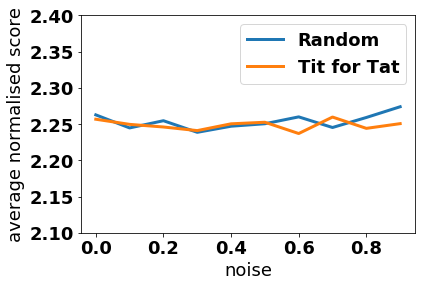

In [8]:
fig, ax = plt.subplots()

plt.plot(tft_points, label='Random', linewidth=3)
plt.plot(random_points, label='Tit for Tat', linewidth=3)

plt.xlabel('noise')
plt.ylabel('average normalised score')

ax.set_xticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'])
plt.ylim(2.1, 2.4)

plt.legend();

We can also repeat each match to remove any variation in the results. This can be done by 
performing a tournament between the strategies. Here I have used a spatial tournament
because we only care for the interactions bewteen Tit for Tats and Tif for Tat with Random. 


In [9]:
players = [axl.Random(),axl.TitForTat(), axl.TitForTat()]
edges = [(0, 1), (1, 2)]
tournament = axl.Tournament(players, edges=edges, noise=0, repetitions=100, turns=500)
results = tournament.play(progress_bar=False)

In [10]:
points = []
for i, noise_v in enumerate(np.linspace(0.1, 0.9, 10)):
    axl.seed(i)
    tournament = axl.Tournament(players, edges=edges, noise=noise_v, repetitions=100, turns=500)
    results = tournament.play(progress_bar=False)
    points.append([np.mean(s) for s in results.normalised_scores])

In [11]:
random_p1 = [s[0] for s in points]
tft_p2 = [s[2] for s in points]

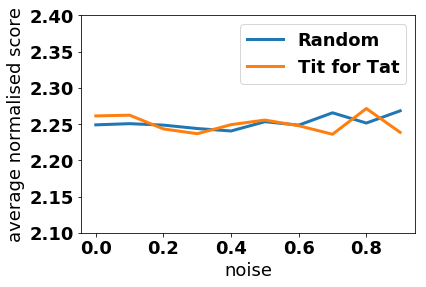

In [12]:
fig, ax = plt.subplots()

plt.plot(random_p1, label='Random', linewidth=3)
plt.plot(tft_p2, label='Tit for Tat', linewidth=3)

plt.ylim(2.1, 2.4)
plt.xlabel('noise')
plt.ylabel('average normalised score')

ax.set_xticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'])

plt.legend();